In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
import pandas as pd
import cv2
import imutils

In [2]:
data = pickle.load(open('./full_pred_2_37', 'rb'))

In [3]:
data

{1: (400, 932, 430, 962, 0),
 2: (398, 930, 430, 965, 0),
 3: (397, 931, 432, 963, 0),
 4: (397, 932, 433, 964, 0),
 5: (397, 931, 433, 963, 0),
 6: (397, 930, 432, 963, 0),
 7: (396, 932, 432, 964, 0),
 8: (396, 932, 433, 964, 0),
 9: (398, 932, 432, 964, 0),
 10: (398, 933, 432, 965, 0),
 11: (398, 933, 432, 965, 0),
 12: (397, 933, 433, 965, 0),
 13: (397, 933, 433, 965, 0),
 14: (398, 934, 432, 965, 0),
 15: (398, 933, 432, 966, 0),
 16: (397, 933, 433, 965, 0),
 17: (397, 933, 432, 965, 0),
 18: (397, 932, 433, 965, 0),
 19: (398, 932, 432, 964, 0),
 20: (397, 932, 432, 965, 0),
 21: (397, 933, 432, 965, 0),
 22: (397, 932, 432, 964, 0),
 23: (397, 933, 432, 966, 0),
 24: (397, 933, 432, 965, 0),
 25: (398, 932, 433, 964, 0),
 26: (397, 933, 432, 964, 0),
 27: (396, 931, 433, 964, 0),
 28: (398, 931, 432, 965, 0),
 29: (397, 931, 432, 965, 0),
 30: (396, 932, 433, 965, 0),
 31: (396, 931, 432, 965, 0),
 32: (397, 932, 432, 965, 0),
 33: (396, 930, 432, 965, 0),
 34: (396, 932, 432

In [4]:
df = pd.DataFrame.from_dict(data).T.reset_index()

In [5]:
df.columns = ['frame_idx', 'x', 'y', 'width', 'height', 'label']
# df['width'] = df['width'] - df['x']
# df['height'] = df['height'] - df['y']

In [25]:
df[220:]

,frame_idx,x,y,width,height,label
220,354,0,0,0,0,0
221,356,400,933,426,962,0
222,365,400,932,427,964,0
223,367,400,931,426,962,0
224,381,399,934,428,962,1
225,382,0,11,0,11,0
226,403,395,889,417,917,1
227,404,395,874,416,898,1
228,405,394,857,413,883,1
229,406,392,841,414,865,1


# Moving average

In [18]:
%matplotlib notebook

In [21]:
df[df['frame_idx']==447].index.values[0]

258

In [23]:
df['frame_idx'][287]

720

<IPython.core.display.Javascript object>


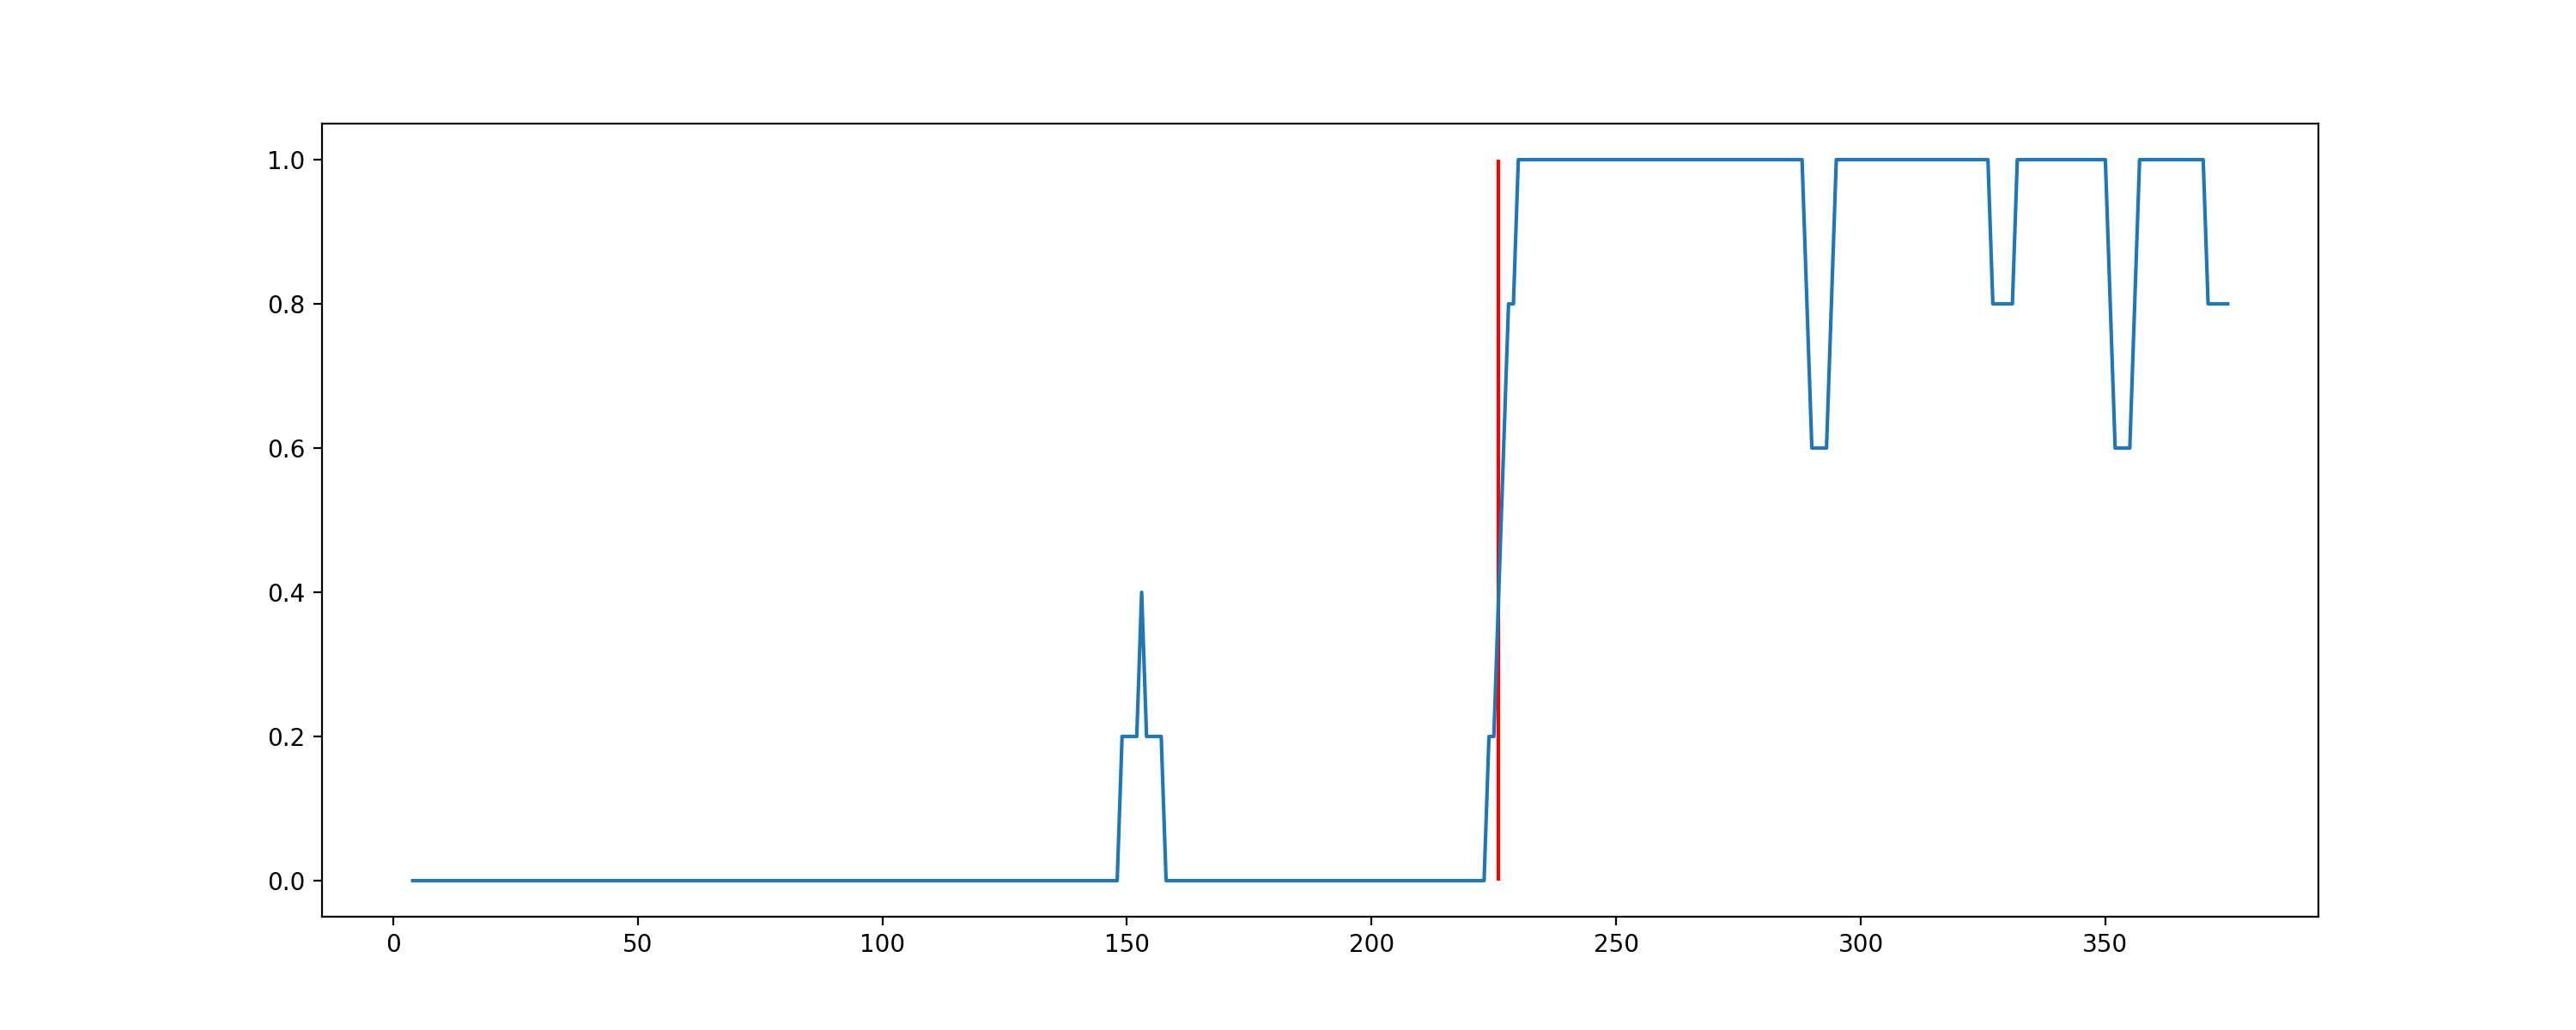

In [22]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(df['label'].rolling(window=5).mean())
plt.vlines(x=df[df['frame_idx']==403].index.values[0], ymin=0, ymax=1, color='red')

In [15]:
df[df['frame_idx']==403].index.values[0]

226

In [7]:
bb_motion = df.loc[df['label']==1, :]

In [8]:
bb_motion.head()

,frame_idx,x,y,width,height,label
149,241,400,932,428,960,1
153,247,400,934,429,960,1
224,381,399,934,428,962,1
226,403,395,889,417,917,1
227,404,395,874,416,898,1


In [9]:
def get_frames(session_no, shot_no):
    vs = cv2.VideoCapture('/Users/xhan/Dropbox/Azimuth/session' +
                          str(session_no) + '/shot_' + str(shot_no) + '.m4v')
    frames = []
    while True:
        success, image = vs.read()
        if not success:
            break
        frames.append(image)

    return frames


def show_img(im, figsize=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    return ax


def draw_outline(plt_object, lw):
    plt_object.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])


def draw_rect(ax, b, color='#00ff00'):
    patch = ax.add_patch(patches.Rectangle(
        b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)


def draw_text(ax, xy, txt, font_sz=14, color='#00ff00'):
    text = ax.text(*xy, txt,
                   verticalalignment='top', color=color, fontsize=font_sz, weight='bold')
    draw_outline(text, 1)

In [10]:
def get_frames_2(p):
    vs = cv2.VideoCapture(p)
    frames = []
    while True:
        success, image = vs.read()
        if not success:
            break
        frames.append(image)

    return frames

In [11]:
frames = get_frames('02', '37')
# frames = get_frames_2('/Users/xhan/Downloads/fullsizeoutput_7d3.mp4')

In [12]:
len(frames)

1124

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
idx = 403
im = cv2.cvtColor(frames[idx-1], cv2.COLOR_BGR2RGB)
bb = df.loc[df['frame_idx'] == idx, :].values[0][1:5]
print(f'Frame: {idx}, Bounding boxes: {bb}')
ax = show_img(im)
if df.loc[df['frame_idx'] == idx, 'label'].values[0] == 0:
    draw_rect(ax, bb, color='#ff0000')
    draw_text(ax, df.loc[df['frame_idx'] == idx, :].values[0][1:3]-50, 'ball_rest', font_sz=14, color='#ff0000')
else:
    draw_rect(ax, bb, color='#00ff00')
    draw_text(ax, df.loc[df['frame_idx'] == idx, :].values[0][1:3]-50, 'ball_in_motion', font_sz=14, color='#00ff00')
plt.show()

In [13]:
def create_contours(resized, thresh):
    """Create mask and contours for the input image."""
    mask = np.zeros(thresh.shape[:2], dtype=np.uint8) # Creates black mask image
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)

    return mask, contours

In [14]:
bb_motion['frame_idx'].values

array([ 241,  247,  381,  403,  404,  405,  406,  407,  408,  409,  410,
        411,  412,  413,  414,  415,  416,  417,  418,  419,  420,  424,
        425,  427,  428,  430,  431,  432,  434,  435,  436,  437,  438,
        439,  442,  447,  688,  689,  690,  691,  692,  693,  695,  696,
        698,  699,  700,  701,  702,  703,  704,  705,  706,  707,  708,
        710,  711,  712,  713,  714,  715,  716,  717,  719,  720,  721,
        726,  752,  756,  793,  822,  823,  827,  828,  829,  830,  831,
        832,  834,  835,  836,  837,  838,  839,  840,  841,  842,  845,
        846,  847,  848,  849,  850,  851,  852,  853,  854,  855,  856,
        857,  858,  859,  861,  862,  863,  864,  865,  866,  867,  868,
        869,  870,  871,  872,  873,  874,  875,  876,  877,  879,  880,
        881,  882,  883,  884,  887,  889,  890,  891,  894,  895,  896,
       1007, 1021, 1039, 1042, 1070, 1098, 1102, 1105, 1107, 1109, 1110,
       1117, 1118, 1121, 1122])

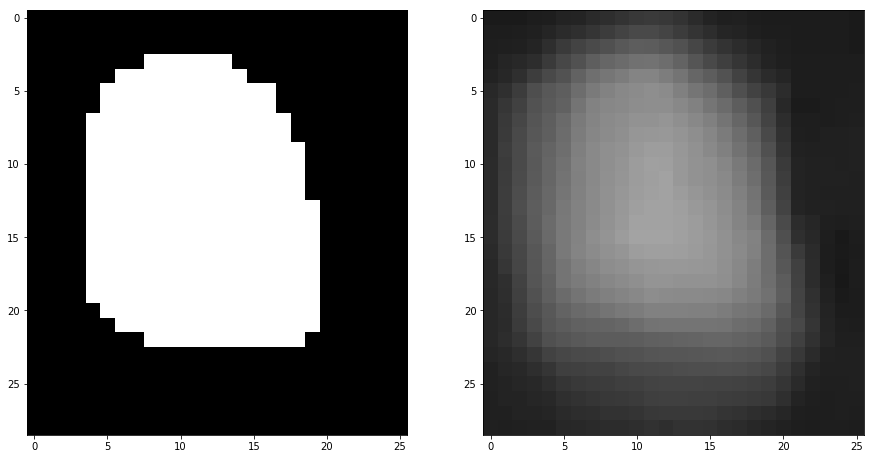

In [15]:
idx = 404
bb = df.loc[df['frame_idx'] == idx, :].values[0][1:5]

im = frames[idx-1]
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = gray[bb[1]:bb[3]+5, bb[0]:bb[2]+5]
blur = cv2.GaussianBlur(gray, (7, 7), 0)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#                                cv2.THRESH_BINARY, 11, 2)
thresh = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)[1]

f, axarr = plt.subplots(1, 2, figsize=(15, 15))
axarr[0].imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)) # plt use RGB color
axarr[1].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()